# Lab 4

## Import Libs and Connect to Database

In [45]:
import pandas
import configparser
import psycopg2

In [46]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [47]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [48]:
cur=conn.cursor()

## Question 1

In [49]:
sql_q1 = """
            select * from gp18.student
            """

In [50]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,GS


## Question 2

In [51]:
sql_q2 = """
        select gp18.professor.p_name,
        gp18.course.c_name
        from gp18.professor
        inner join gp18.course
        on gp18.professor.p_email = gp18.course.p_email
        
        """

In [52]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Matthew Ezzell,Social Theory
1,Noel Hendrickson,Counterfactual Reasoning
2,Ronald Raab,Selected Topics in IA
3,Alexis Mays,Into To Dark Web
4,new_p,new_c_name
5,new_p,Data Mining


## Question 3

In [53]:

sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp18.enroll_list
        group by c_number
        order by enrolled desc
        """

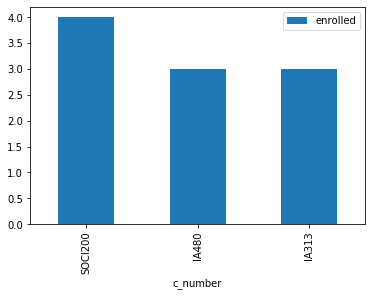

In [54]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## Question 4

In [55]:
sql_q4 = """
        select gp18.professor.p_name,
        count(gp18.course.c_name) as teaching_number
        from gp18.professor
        inner join gp18.course
        on gp18.professor.p_email = gp18.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

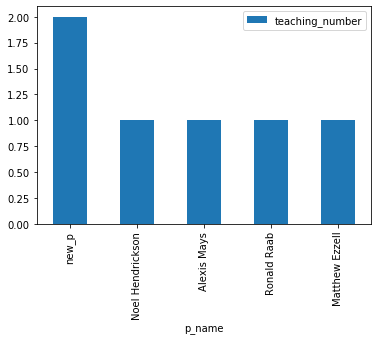

In [56]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Question 5

In [57]:
sql_q5_professor = """
                    insert into gp18.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [58]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(new_p@jmu.edu) already exists.


In [59]:
conn.commit()

In [60]:
df=pandas.read_sql_query('select * from gp18.professor',conn)
df[:]

,p_email,p_name,office
0,raabrw@jmu.edu,Ronald Raab,ISAT/CS 156
1,hendrinx@jmu.edu,Noel Hendrickson,None
2,ezzellmb@jmu.edu,Matthew Ezzell,Sheldon 214
3,amays@jmu.edu,Alexis Mays,ISAT/CS 369
4,new_p@jmu.edu,new_p,new_office


In [61]:
sql_q5_course = """
                    insert into gp18.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [64]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [63]:
#cur.execute('ROLLBACK')

In [23]:
conn.commit()

In [25]:
df=pandas.read_sql_query('select * from gp18.course',conn)
df[:]

,c_number,c_name,room,p_email
0,SOCI200,Social Theory,online,ezzellmb@jmu.edu
1,IA313,Counterfactual Reasoning,online,hendrinx@jmu.edu
2,IA480,Selected Topics in IA,online,raabrw@jmu.edu
3,IA 430,Into To Dark Web,ENGEO 2213,amays@jmu.edu
4,ia_new,new_c_name,ENGEO_2213,new_p@jmu.edu
5,IA340,Data Mining,online,new_p@jmu.edu


## Question 6

In [26]:
sql_q6_course = """
                update gp18.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [27]:
cur.execute(sql_q6_course)

In [28]:
conn.commit()

In [30]:
df=pandas.read_sql_query('select * from gp18.course',conn)
df[:]

,c_number,c_name,room,p_email
0,SOCI200,Social Theory,online,ezzellmb@jmu.edu
1,IA313,Counterfactual Reasoning,online,hendrinx@jmu.edu
2,IA480,Selected Topics in IA,online,raabrw@jmu.edu
3,IA 430,Into To Dark Web,ENGEO 2213,amays@jmu.edu
4,ia_new,new_c_name,ENGEO_2213,new_p@jmu.edu
5,IA340,Data Mining,online,new_p@jmu.edu


In [31]:
sql_q6_professor = """
                delete from gp18.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [32]:
cur.execute(sql_q6_professor)

In [33]:
conn.commit()

In [35]:
df=pandas.read_sql_query('select * from gp18.professor',conn)
df[:]

,p_email,p_name,office
0,raabrw@jmu.edu,Ronald Raab,ISAT/CS 156
1,hendrinx@jmu.edu,Noel Hendrickson,None
2,ezzellmb@jmu.edu,Matthew Ezzell,Sheldon 214
3,amays@jmu.edu,Alexis Mays,ISAT/CS 369
4,new_p@jmu.edu,new_p,new_office


## Close Connection 

In [65]:
cur.close()
conn.close()